josé Armando Melchor Soto

### Sección 1: Conceptos Teóricos (40 puntos)
(5 pts) ¿Cuál es la diferencia entre una regresión lineal simple y una regresión lineal múltiple? Da un ejemplo de cada una.

Que en una se modela la relación entre una variable independiente (X) y una variable dependiente(Y).  Y esta se ajusta a una línea recta. 
Mientras que en la otra(múltiple) hay más variables independientes. 

Un ejemplo puede ser como en el df de las casas en california
### Simple
$Precio = \beta_0 + \beta_1 (Ubicación)$

### Múltiple
$Precio = \beta_0 + \beta_1(Ubicación) + \beta_2(Camas) + \beta_3(Habitaciones) +.... \beta_n x_n $

(5 pts) Explica el problema de overfitting y cómo podrías mitigarlo 

El problema es que se ajusta demasiado el modelo se ajusta demasiado a tu test , y esto provoca que no haya error, esto podria significar que tu modelo está memorizando de más tus datos. Esto se puede comprobar si haces Cross-Validation porque te da un error muy alto. Se puede mitigar utilizando Lasso o Ridge en el modelo ó dandole más datos a tu test.



(5 pts) En regresión polinomial, ¿por qué es necesario realizar un análisis de validación cruzada antes de elegir el grado del polinomio?

Porque nos ayuda a ver si el modelo que estabamos haciendo va de buena manera y está prediciendo bien, dividiendo los datos en partes y entretandolos de manera iterada, evita que haya overfitting y que esté memorizando tus datos. 



(5 pts) ¿Qué es una prueba de hipótesis en el contexto de regresión lineal? Explica cómo se interpreta el p-value de un coeficiente.

Una prueba de hipotesis nos ayuda a saber si una variable del df es significativa para la prueba y con esto vemos si hay una relacion entre las variables. Si el p-value es mayor de 0.05, significa que no tienen tanto peso la variable. Si es menor que eso (0.05) significa que la variable es buena.



(5 pts) ¿Por qué convertir variables categóricas en dummies puede mejorar el desempeño de un modelo? ¿En qué casos podríamos usar una codificación diferente?


Porque al convertir variables categóricas en dummies nos permite que los modelos numéricos las procesen correctamente, ya que muchos algoritmos requieren que todas las variables sean numéricas. Esto mejora el rendimiento del modelo al evitar malinterpretaciones entre categorías y asegurarse de que el modelo no asuma una relación de orden entre ellas. 
Podríamos usarlo en casos como por eemplo, si nuestra variable es Tamaño con valores como 'Pequeño', 'Mediano' y 'Grande', convertirla en dummies asegura que el modelo no piense que 'Pequeño' es menor o mayor que 'Mediano'.
Se pueden utilizar otros como label encoding , que esto lo que hace es que da un orden artificial asignandole numeros a cada categoria.


(5 pts) Explica como se obtienen los coeficientes de una regresión lineal con decenso en gradiente (tanto para lineal como polinomio), me tiene que quedar claro que le entiendes

Se tiene una derivada parcial que es la función de costo , a esta se le actualizan los coeficientes de la tasa de aprendizaje y a esto se le tiene que sacar la derivada iteradas veces hasta que converja.  Esto es un proceso que lo que se busca es el minimizar el error de la función de perdida, actualizando las betas con las derivadas parciales.


(5 pts) Explica que es el teorema de Frisch-Waugh-Lovell

Este es un modelo de regresión múltiple, el coeficiente estimado de una variable es el mismo que se obtendría al ajustar los residuos de las demás variables y luego hacer una regresión sobre esos residuos. Es útil para entender cómo aislar el efecto de una variable en presencia de otras.



(5 pts) Explica que es K-nearest neighboors


Es un algoritmo de aprendizaje que nos ayuda tanto a predecir como a clasificar, y se basa en el número de vecinos más cercanos según las características del punto. Este algoritmo calcula las distancias entre el punto a predecir y los datos de entrenamiento, selecciona los vecinos más cercanos, y luego hace un promedio de sus valores para obtener la predicción.


### Sección 2 (20 puntos)

(10 pts) Dado el siguiente dataset de casas:

```
data = pd.DataFrame({
    "Tamaño_m2": [50, 80, 120, 200, 150, 90, 175, 60, 220, 130],
    "Habitaciones": [1, 2, 3, 4, 3, 2, 3, 1, 5, 3],
    "Precio_1000s": [110, 170, 250, 400, 270, 200, 330, 190, 600, 380]  })
````



a) Ajusta una regresión lineal para predecir el precio en función del tamaño y número de habitaciones, dime el R2 y coeficientes.


b) Imagina que el coeficiente de Tamaño es 2.5 y el coeficiente de Habitaciones es 20, ¿cómo interpretarías estos valores?  

$ Precio= \beta_0 + 2.5(Tamaño) + 20(Habitaciones) $



(20 pts) Imagina que entrenas un modelo de regresión polinomial de grado 5 y obtienes un 𝑅2 de 0.98 en el conjunto de entrenamiento y 0.65 en el conjunto de prueba.
- a) ¿Qué problema podrías estar enfrentando?

Podríamos estar hablando de overfitting ,El modelo ajusta demasiado a los datos de entrenamiento $R^2=  0.98 $,  pero no generaliza bien a los datos de prueba $R^2 = 0.65$, lo que indica que el modelo pudo haber ruido de los datos de entrenamiento.

- b) ¿Cómo lo solucionarías sin reducir demasiado la capacidad del modelo?

Se puede solucionar con una Regulización Lasso o Ridge o podemos ver si cuando bajamos el grado del polinomio el modelo sigue memorizando los datos o ya se está entrenando de manera correcta.

In [44]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

df = pd.DataFrame({
    "Tamaño_m2": [50, 80, 120, 200, 150, 90, 175, 60, 220, 130],
    "Habitaciones": [1, 2, 3, 4, 3, 2, 3, 1, 5, 3],
    "Precio_1000s": [110, 170, 250, 400, 270, 200, 330, 190, 600, 380]  })

df.head()

,Tamaño_m2,Habitaciones,Precio_1000s
0,50,1,110
1,80,2,170
2,120,3,250
3,200,4,400
4,150,3,270


In [45]:
df[['Tamaño_m2', 'Habitaciones']].corr()

,Tamaño_m2,Habitaciones
Tamaño_m2,1.000000,0.958816
Habitaciones,0.958816,1.000000


In [46]:
X = df[['Tamaño_m2', 'Habitaciones']]
y= df['Precio_1000s']

In [47]:
model= linear_model.LinearRegression().fit(X, y)

predicciones= model.predict(X)

# Calcular métricas de rendimiento
r2 = r2_score(y_pred=predicciones, y_true=y)
mse_per_sample = (y - predicciones) ** 2

mse = mean_squared_error(y_pred=predicciones, y_true=y)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 2472.8186867967524
R^2 Score: 0.8661894650001758


In [48]:
model.coef_

array([ 0.44694488, 86.33385558])

In [49]:
model.intercept_

np.float64(-0.08688221051124856)

In [50]:
predicciones= model.predict(X)


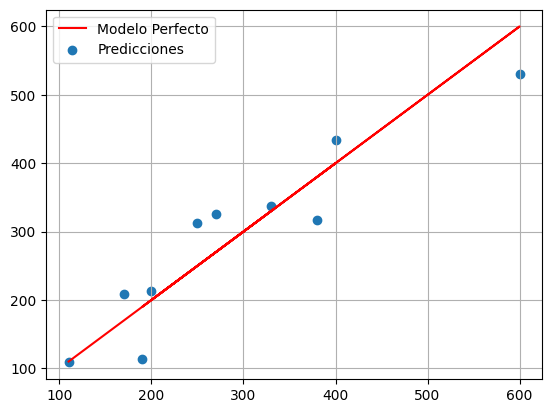

In [51]:
from matplotlib import pyplot as plt

# Use the training data for plotting the predictions
plt.plot(y, y, color='red', label='Modelo Perfecto')
plt.scatter(y, predicciones, label='Predicciones')
plt.grid()
plt.legend()
plt.show()

### Sección 3: Implementación de Código (40 puntos)



1- En el dataset Advertising.csv estan las ventas de una empresa y hay 3 canales de distribuición:
    
- radio
- Televisión
- Periodico


La empresa quiere simplificar su operción y eliminar aquellos canales que no traen ventas.

Dime que canal o canales no sirven con una prueba de hipotesis y una regresión


    

In [52]:
df= pd.read_csv('Advertising.csv')

In [53]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [54]:
model = smf.ols('sales ~ TV + newspaper + radio', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        21:33:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Estadísticamente, el canal que no tiene impacto significativo es el de newspaper, ya que no hay suficiente evidencia para afirmar que tiene un efecto relevante en las ventas. Su coeficiente es negativo, lo que podría indicar que, en lugar de aumentar las ventas, podría estar reduciéndolas. Además, es el canal con el P-value más alto (superior a 0.05), con un P-value = 0.860, lo que refuerza la idea de que no es significativo.